<a href="https://colab.research.google.com/github/MercyKangethe/prostrate-cancer-prediction/blob/main/prostrate_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**PREDICTING PROSTRATE CANCER USING BIOPSY RESULTS**


In [46]:
#importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")



In [3]:
from google.colab import files
uploaded = files.upload()


Saving prostate_cancer_prediction.csv to prostate_cancer_prediction.csv


In [4]:
df = pd.read_csv("prostate_cancer_prediction.csv")
df.head()

,Patient_ID,Age,Family_History,Race_African_Ancestry,PSA_Level,DRE_Result,Biopsy_Result,Difficulty_Urinating,Weak_Urine_Flow,Blood_in_Urine,...,Alcohol_Consumption,Hypertension,Diabetes,Cholesterol_Level,Screening_Age,Follow_Up_Required,Prostate_Volume,Genetic_Risk_Factors,Previous_Cancer_History,Early_Detection
0,1,78,No,Yes,5.07,Normal,Benign,No,No,No,...,Moderate,No,No,Normal,45,No,46.0,No,No,Yes
1,2,68,No,Yes,10.24,Normal,Benign,Yes,No,No,...,Low,No,No,High,65,No,78.2,No,No,Yes
2,3,54,No,No,13.79,Normal,Benign,No,No,No,...,Low,No,No,Normal,61,No,21.1,No,No,Yes
3,4,82,No,No,8.03,Abnormal,Benign,No,No,No,...,Low,No,No,Normal,47,Yes,79.9,No,Yes,Yes
4,5,47,Yes,No,1.89,Normal,Malignant,Yes,Yes,No,...,Moderate,Yes,No,Normal,72,No,32.0,No,No,Yes


In [5]:
# check for missing values
df.isnull().sum()

,0
Patient_ID,0
Age,0
Family_History,0
Race_African_Ancestry,0
PSA_Level,0
DRE_Result,0
Biopsy_Result,0
Difficulty_Urinating,0
Weak_Urine_Flow,0
Blood_in_Urine,0


In [6]:
# check for the data information
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27945 entries, 0 to 27944
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               27945 non-null  int64  
 1   Age                      27945 non-null  int64  
 2   Family_History           27945 non-null  object 
 3   Race_African_Ancestry    27945 non-null  object 
 4   PSA_Level                27945 non-null  float64
 5   DRE_Result               27945 non-null  object 
 6   Biopsy_Result            27945 non-null  object 
 7   Difficulty_Urinating     27945 non-null  object 
 8   Weak_Urine_Flow          27945 non-null  object 
 9   Blood_in_Urine           27945 non-null  object 
 10  Pelvic_Pain              27945 non-null  object 
 11  Back_Pain                27945 non-null  object 
 12  Erectile_Dysfunction     27945 non-null  object 
 13  Cancer_Stage             27945 non-null  object 
 14  Treatment_Recommended 

Our data has 30 columns and 27945 entries.
we need to drop the leakaging columns


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27945 entries, 0 to 27944
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               27945 non-null  int64  
 1   Age                      27945 non-null  int64  
 2   Family_History           27945 non-null  object 
 3   Race_African_Ancestry    27945 non-null  object 
 4   PSA_Level                27945 non-null  float64
 5   DRE_Result               27945 non-null  object 
 6   Biopsy_Result            27945 non-null  object 
 7   Difficulty_Urinating     27945 non-null  object 
 8   Weak_Urine_Flow          27945 non-null  object 
 9   Blood_in_Urine           27945 non-null  object 
 10  Pelvic_Pain              27945 non-null  object 
 11  Back_Pain                27945 non-null  object 
 12  Erectile_Dysfunction     27945 non-null  object 
 13  Exercise_Regularly       27945 non-null  object 
 14  Healthy_Diet          

In [12]:
df=df.drop(columns=["Patient_ID"])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27945 entries, 0 to 27944
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      27945 non-null  int64  
 1   Family_History           27945 non-null  object 
 2   Race_African_Ancestry    27945 non-null  object 
 3   PSA_Level                27945 non-null  float64
 4   DRE_Result               27945 non-null  object 
 5   Biopsy_Result            27945 non-null  object 
 6   Difficulty_Urinating     27945 non-null  object 
 7   Weak_Urine_Flow          27945 non-null  object 
 8   Blood_in_Urine           27945 non-null  object 
 9   Pelvic_Pain              27945 non-null  object 
 10  Back_Pain                27945 non-null  object 
 11  Erectile_Dysfunction     27945 non-null  object 
 12  Exercise_Regularly       27945 non-null  object 
 13  Healthy_Diet             27945 non-null  object 
 14  BMI                   

In [14]:
# summary of numeric variables
df.describe()

,Age,PSA_Level,BMI,Prostate_Volume
count,27945.000000,27945.000000,27945.000000,27945.000000
mean,64.459939,7.751599,26.511605,47.755770
std,14.404755,4.175012,4.888293,18.704286
min,40.000000,0.500000,18.000000,15.000000
25%,52.000000,4.130000,22.300000,31.700000
50%,64.000000,7.750000,26.500000,47.700000
75%,77.000000,11.320000,30.700000,63.900000
max,89.000000,15.000000,35.000000,80.000000


from matplotlib import pyplot as plt
_df_0['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['PSA_Level'].plot(kind='hist', bins=20, title='PSA_Level')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['BMI'].plot(kind='hist', bins=20, title='BMI')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['Prostate_Volume'].plot(kind='hist', bins=20, title='Prostate_Volume')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='Age', y='PSA_Level', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='PSA_Level', y='BMI', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='BMI', y='Prostate_Volume', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7['Age'].plot(kind='line', figsize=(8, 4), title='Age')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['PSA_Level'].plot(kind='line', figsize=(8, 4), title='PSA_Level')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['BMI'].plot(kind='line', figsize=(8, 4), title='BMI')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['Prostate_Volume'].plot(kind='line', figsize=(8, 4), title='Prostate_Volume')
plt.gca().spines[['top', 'right']].set_visible(False)

EXPLORATORY DATA ANALYSIS


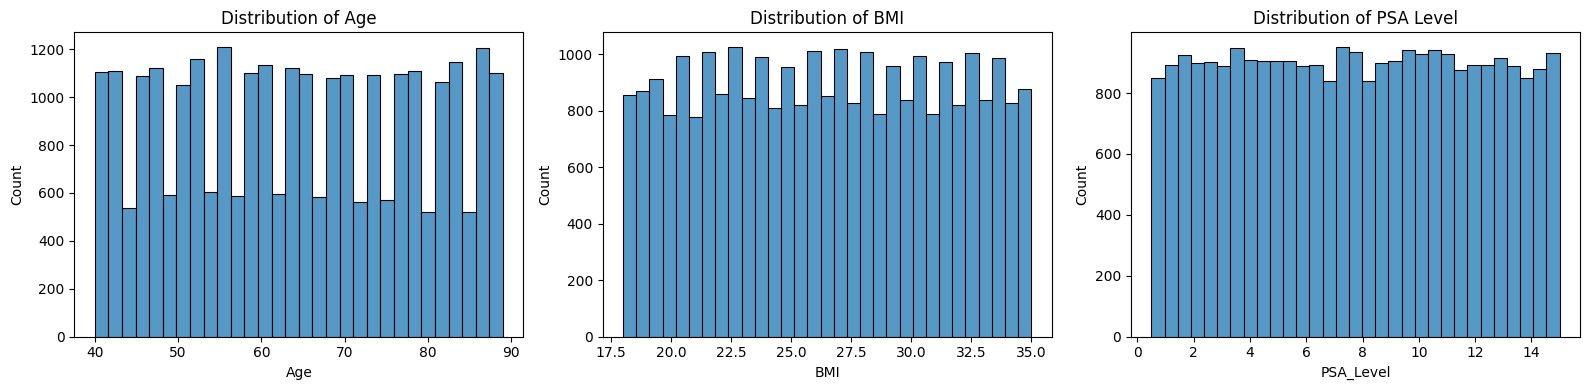

In [15]:
#look at distribution of key metrics
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(16, 4))  # 1 row, 3 columns

# Plot Age
sns.histplot(x=df["Age"], ax=axes[0])
axes[0].set_title("Distribution of Age")

# Plot BMI
sns.histplot(x=df["BMI"], ax=axes[1])
axes[1].set_title("Distribution of BMI")

# Plot PSA_Level
sns.histplot(x=df["PSA_Level"], ax=axes[2])
axes[2].set_title("Distribution of PSA Level")

plt.tight_layout()
plt.show()

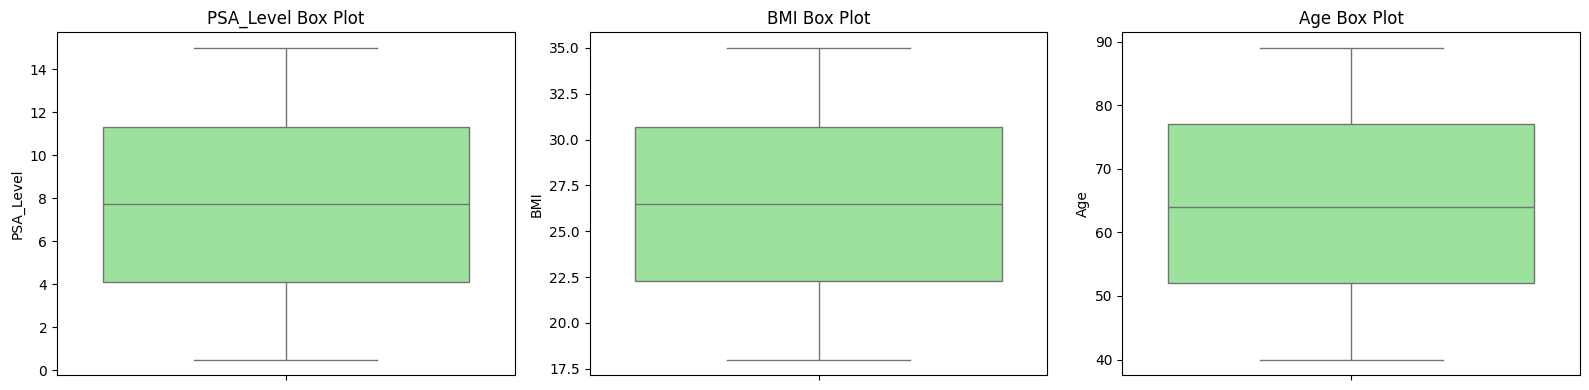

In [16]:
# check on the distribution and outliers
plt.figure(figsize=(16, 4))

for i, feature in enumerate(['PSA_Level', 'BMI', 'Age']):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df[feature], color='lightgreen')
    plt.title(f'{feature} Box Plot')
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


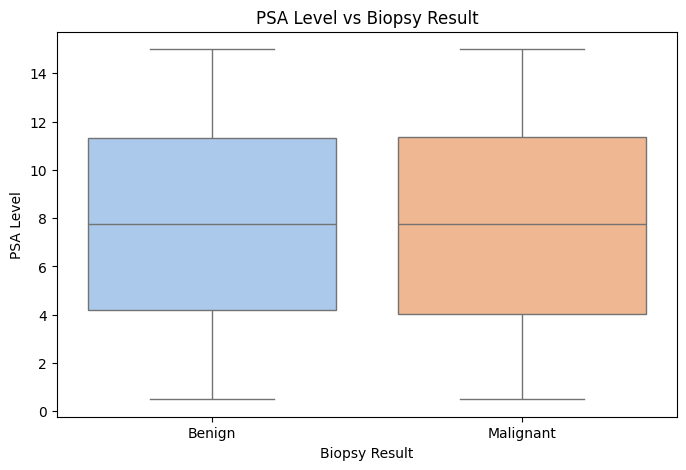

In [18]:
# PSA Level vs Biopsy Result
plt.figure(figsize=(8,5))
sns.boxplot(x='Biopsy_Result', y='PSA_Level', data=df, palette='pastel')
plt.title("PSA Level vs Biopsy Result")
plt.xlabel("Biopsy Result")
plt.ylabel("PSA Level")
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.show()


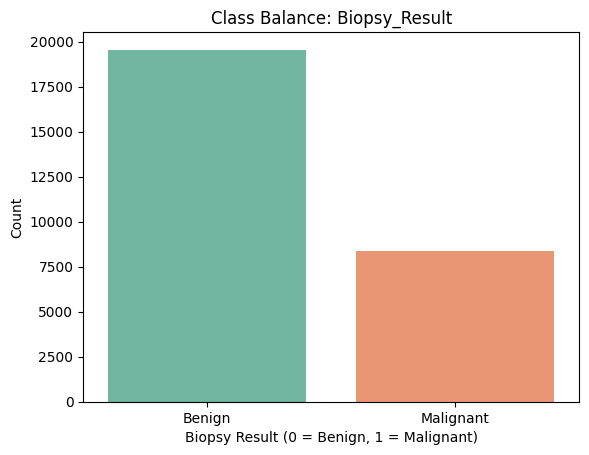

,count
Biopsy_Result,
Benign,19549
Malignant,8396


In [20]:
#  Class Balance of Biopsy_Result
sns.countplot(x='Biopsy_Result', data=df, palette='Set2')
plt.title("Class Balance: Biopsy_Result")
plt.xlabel("Biopsy Result (0 = Benign, 1 = Malignant)")
plt.ylabel("Count")
plt.show()

df['Biopsy_Result'].value_counts()


In [31]:
# Identify non-numeric columns in the dataframe BEFORE splitting
categorical_cols = df.select_dtypes(include='object').columns
print("Categorical columns to encode:", categorical_cols)

# Apply Label Encoding to each categorical column
# This will convert 'Yes'/'No' (or other strings) into numerical labels
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# --- End of new/modified code ---


Categorical columns to encode: Index([], dtype='object')


From our visual we can see that benign outnumber malignant thus we have a class imbalance issue and we should fix it before fitting our model using the class weight from random forest classifier

**FITTING A RANDOM FOREST CLASSIFIER**

In [33]:
# Identify our feature and target variable
# Set Biopsy_Result as target
X = df.drop(columns=['Biopsy_Result'])
y = df['Biopsy_Result']


In [34]:
# Spliiting the data into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [47]:
# 1. Oversample the training set
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [51]:
# Train your model
model = RandomForestClassifier(class_weight='balanced', random_state=42)
model.fit(X_resampled, y_resampled)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [49]:
#make predictions
y_pred = model.predict(X_test)

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': ['balanced']
}

# Step 2: Initialize the base model
rf = RandomForestClassifier(random_state=42)

# Step 3: Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1',  # Or use 'recall' to focus on catching malignant
    cv=3,
    n_jobs=-1,
    verbose=2
)

# Step 4: Fit the model on resampled data
grid_search.fit(X_resampled, y_resampled)

# Step 5: Print the best parameters
print("✅ Best parameters:", grid_search.best_params_)

# Step 6: Evaluate the best model on test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\n🧾 Classification Report:")
print(classification_report(y_test, y_pred))

print("\n📉 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Fitting 3 folds for each of 24 candidates, totalling 72 fits
✅ Best parameters: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

🧾 Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.97      0.81      3910
           1       0.31      0.03      0.06      1679

    accuracy                           0.69      5589
   macro avg       0.51      0.50      0.44      5589
weighted avg       0.58      0.69      0.59      5589


📉 Confusion Matrix:
[[3792  118]
 [1625   54]]


**EVALUATE THE MODEL**

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.96      0.81      3910
           1       0.35      0.05      0.08      1679

    accuracy                           0.69      5589
   macro avg       0.53      0.50      0.45      5589
weighted avg       0.60      0.69      0.59      5589



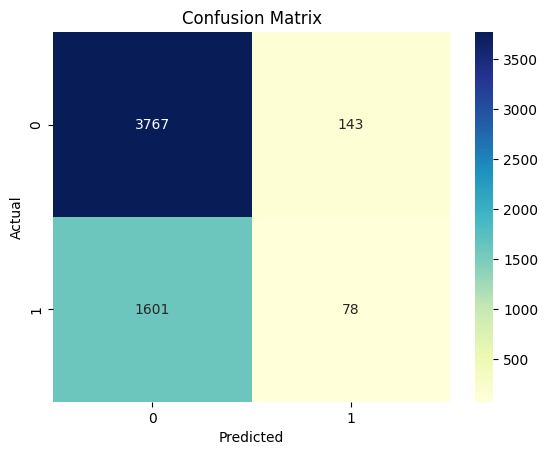

In [52]:
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


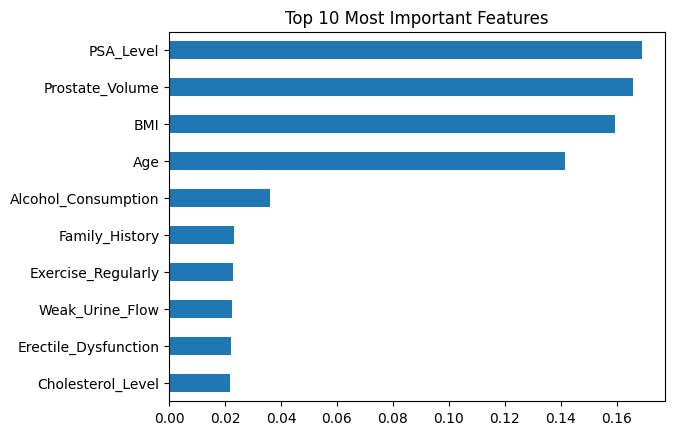

In [39]:
# look at our most important features
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Most Important Features")
plt.gca().invert_yaxis()
plt.show()
